In [1]:
from modelforge.potential import RadialSymmetryFunction, CosineCutoff
import torch
from openff.units import unit

cutoff = CosineCutoff(cutoff=unit.Quantity(5.0, unit.angstrom))
rbf_expension = RadialSymmetryFunction(
    number_of_radial_basis_functions=18, max_distance=unit.Quantity(5.0, unit.angstrom)
)
import numpy as np
xs = np.linspace(0,.5,18)
import matplotlib.pyplot as plt


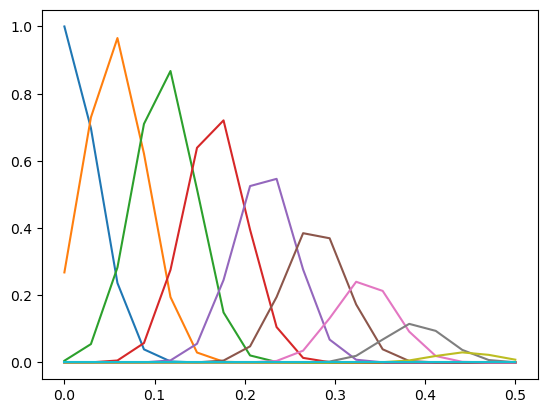

In [2]:
rs = torch.tensor([[r] for r in np.linspace(0,0.5, 10)])
vs = rbf_expension(rs) * cutoff(rs)
for i in range(10):
    plt.plot(xs, vs[i].numpy())
plt.show()

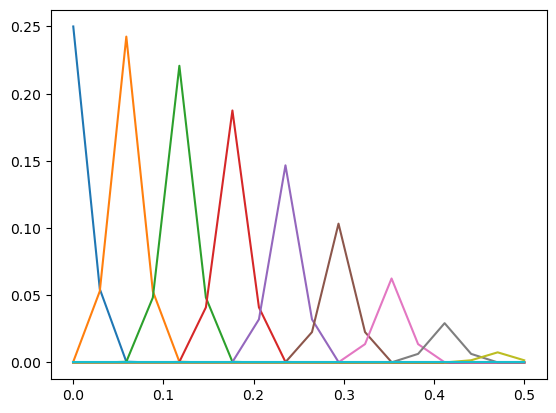

In [3]:
from modelforge.potential.utils import CosineCutoff, AniRadialSymmetryFunction
import torch
from openff.units import unit

cutoff = CosineCutoff(cutoff=unit.Quantity(5.0, unit.angstrom))
rbf_expension = AniRadialSymmetryFunction(
    number_of_radial_basis_functions=18, max_distance=unit.Quantity(5.0, unit.angstrom)
)
rs = torch.tensor([[r] for r in np.linspace(0,0.5, 10)])
vs = rbf_expension(rs) * cutoff(rs)
for i in range(10):
    plt.plot(xs, vs[i].numpy())
plt.show()

In [4]:
# generate a random list of distances, all < 5
d_ij = torch.tensor([0.9,.1,.2,.3,.4,.5]) * 5

# ANI constants
radial_cutoff = 5.0  # radial_cutoff
radial_start = 0.8
radial_dist_divisions = 16
EtaR = torch.tensor([19.7])  # radial eta
ShfR = torch.linspace(radial_start, radial_cutoff, radial_dist_divisions + 1)[:-1]
from torchani.aev import radial_terms

r_ani = radial_terms(5, EtaR, ShfR, d_ij)  # torch.Size([5,8]) # NOTE: Angstrom


/home/mwieder/mambaforge/envs/modelforge3.11/lib/python3.11/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")


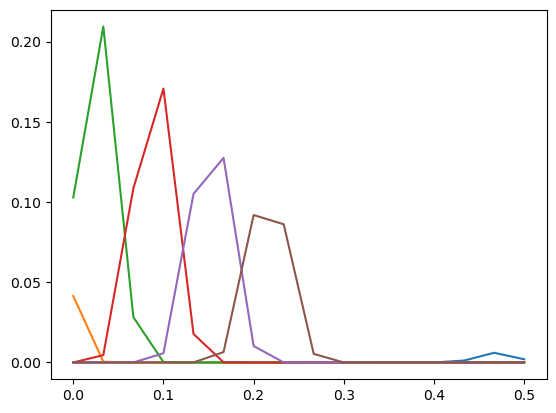

In [5]:
vs = r_ani
xs = np.linspace(0,.5,16)

for i in range(6):
    plt.plot(xs, vs[i].numpy())
plt.show()

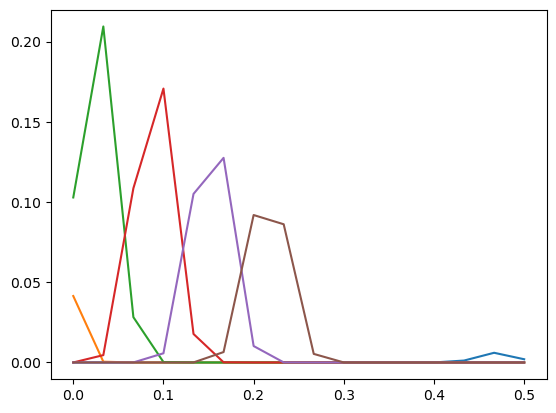

In [6]:
d_ij = torch.tensor([[0.9],[.1],[.2],[.3],[.4],[.5]]) * .5
rbf_expension = AniRadialSymmetryFunction(
    number_of_radial_basis_functions=16, max_distance=unit.Quantity(5.0, unit.angstrom), min_distance=unit.Quantity(.8, unit.angstrom)
)
vs = rbf_expension(d_ij) * cutoff(d_ij)
for i in range(6):
    plt.plot(xs, vs[i].numpy())
plt.show()

In [7]:
r_ani

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.4213e-41, 1.2824e-32, 7.6607e-25, 3.0300e-18, 7.9349e-13, 1.3758e-08,
         1.5796e-05, 1.2007e-03, 6.0431e-03, 2.0138e-03],
        [4.1417e-02, 4.7878e-04, 3.6646e-07, 1.8571e-11, 6.2316e-17, 1.3845e-23,
         2.0365e-31, 1.9836e-40, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0283e-01, 2.0938e-01, 2.8227e-02, 2.5196e-04, 1.4891e-07, 5.8272e-12,
         1.5098e-17, 2.5901e-24, 2.9419e-32, 2.2125e-41, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.2748e-05, 4.5720e-03, 1.0856e-01, 1.7069e-01, 1.7768e-02, 1.2247e-04,
         5.5888e-08, 1.6887e-12, 3.3785e-18, 4.4753e-25, 3.9250e-33, 2.2799e-42,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.8305e-14, 4.9463e-09, 2.0688e-05, 5.7288e-03, 1.0504e-01, 1.2752e-01,
         1.0250e-02, 5.4552e-05, 1.9223